# Exercice 0

In [1]:
options(repr.plot.width=15, repr.plot.height=10)

In [2]:
#install.packages("FactoMineR") #à ne faire qu'une fois
library(FactoMineR)
data <- read.csv("../data/decathlon.csv") #ou bien passer l'URL

In [3]:
head(data)

Name    X100m Long.jump Shot.put High.jump X400m X110m.hurdle Discus
1 SEBRLE  11.04 7.58      14.83    2.07      49.81 14.69        43.75 
2 CLAY    10.76 7.40      14.26    1.86      49.37 14.05        50.72 
3 KARPOV  11.02 7.30      14.77    2.04      48.37 14.09        48.95 
4 BERNARD 11.02 7.23      14.25    1.92      48.93 14.99        40.87 
5 YURKOV  11.34 7.09      15.19    2.10      50.42 15.31        46.26 
6 WARNERS 11.11 7.60      14.31    1.98      48.68 14.23        41.10 
  Pole.vault Javeline X1500m Rank Points Competition
1 5.02       63.19    291.7  1    8217   Decastar   
2 4.92       60.15    301.5  2    8122   Decastar   
3 4.92       50.31    300.2  3    8099   Decastar   
4 5.32       62.77    280.1  4    8067   Decastar   
5 4.72       63.44    276.4  5    8036   Decastar   
6 4.92       51.77    278.1  6    8030   Decastar

In [4]:
# On écarte la première colonne contenant les noms, après l'avoir affectée (pour un affichage plus joli)
row.names(data) <- data[,1]
data <- data[,-1]

In [5]:
# On veut des variables résumant les performances aux différentes épreuves.
# Les variables Rank, Points et Competition seront donc considérées a posteriori.
# Attention à bien renseigner le type de variable : quanti.sup pour les variables numériques quali.sup sinon.
res.pca <- PCA(data, quanti.sup=11:12, quali.sup=13)

Aide obtenue via ?plot.PCA :

     plot(x, axes = c(1, 2), choix = c("ind","var","varcor"),
         ellipse = NULL, xlim = NULL, ylim = NULL, habillage="none", 
         col.hab = NULL, col.ind="black", col.ind.sup="blue", 
         col.quali="magenta", col.quanti.sup="blue", col.var="black",
         label = c("all","none","ind","ind.sup","quali","var","quanti.sup"),
             invisible = c("none","ind","ind.sup","quali","var","quanti.sup"), 
         lim.cos2.var = 0., title = NULL, palette=NULL,
         autoLab = c("auto","yes","no"), new.plot = FALSE, select = NULL, 
             unselect = 0.7, shadowtext = FALSE, legend = list(bty = "y", x = "topleft"),
             graph.type = c("ggplot","classic"), ggoptions = NULL, ...)

axes : les deux axes à considérer (le premier en abscisse, le second en ordonnée). <br>
choix : les individus ("ind"), ou les variables ("var") sur le cercle des corrélations. <br>
habillage : colorier selon une variable (groupes, ou bien coloriage "continu"). <br>
... <br>
select : permet par exemple de limiter le dessin aux individus les mieux représentés.

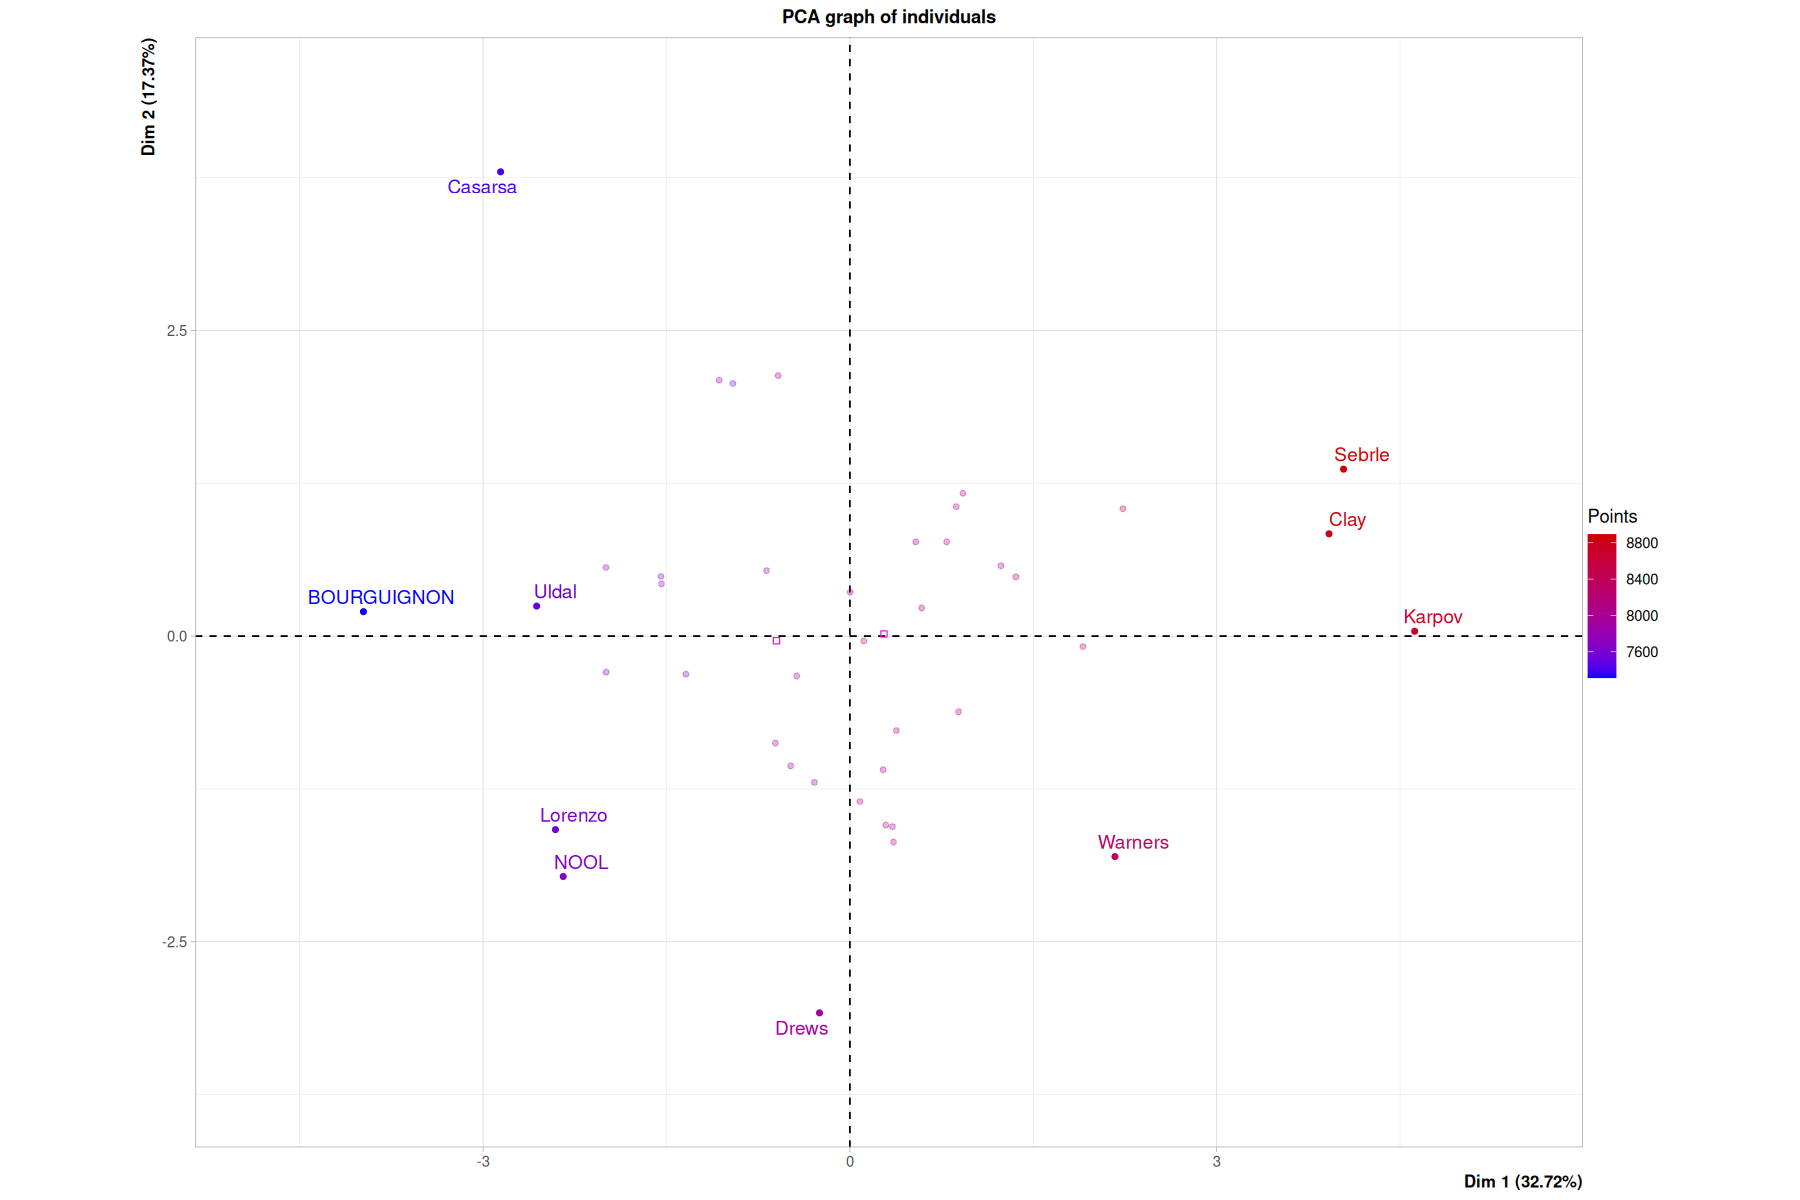

In [6]:
plot(res.pca, choix="ind", habillage=12, label="ind", select="cos2 10")
# Les 10 individus les mieux représentés sur le plan 1-2 (situés "logiquement" loin de l'origine).

In [7]:
# Cos2 des individus en question (= contributions)
sort(rowSums(res.pca$ind$cos2), decreasing=TRUE)[1:10]

Warners     Casarsa BOURGUIGNON       Uldal      YURKOV        Nool 
  0.9897536   0.9797802   0.9736589   0.9666727   0.9568105   0.9536100 
      Drews      Sebrle       Macey      Karpov 
  0.9492748   0.9452628   0.9377062   0.9221455

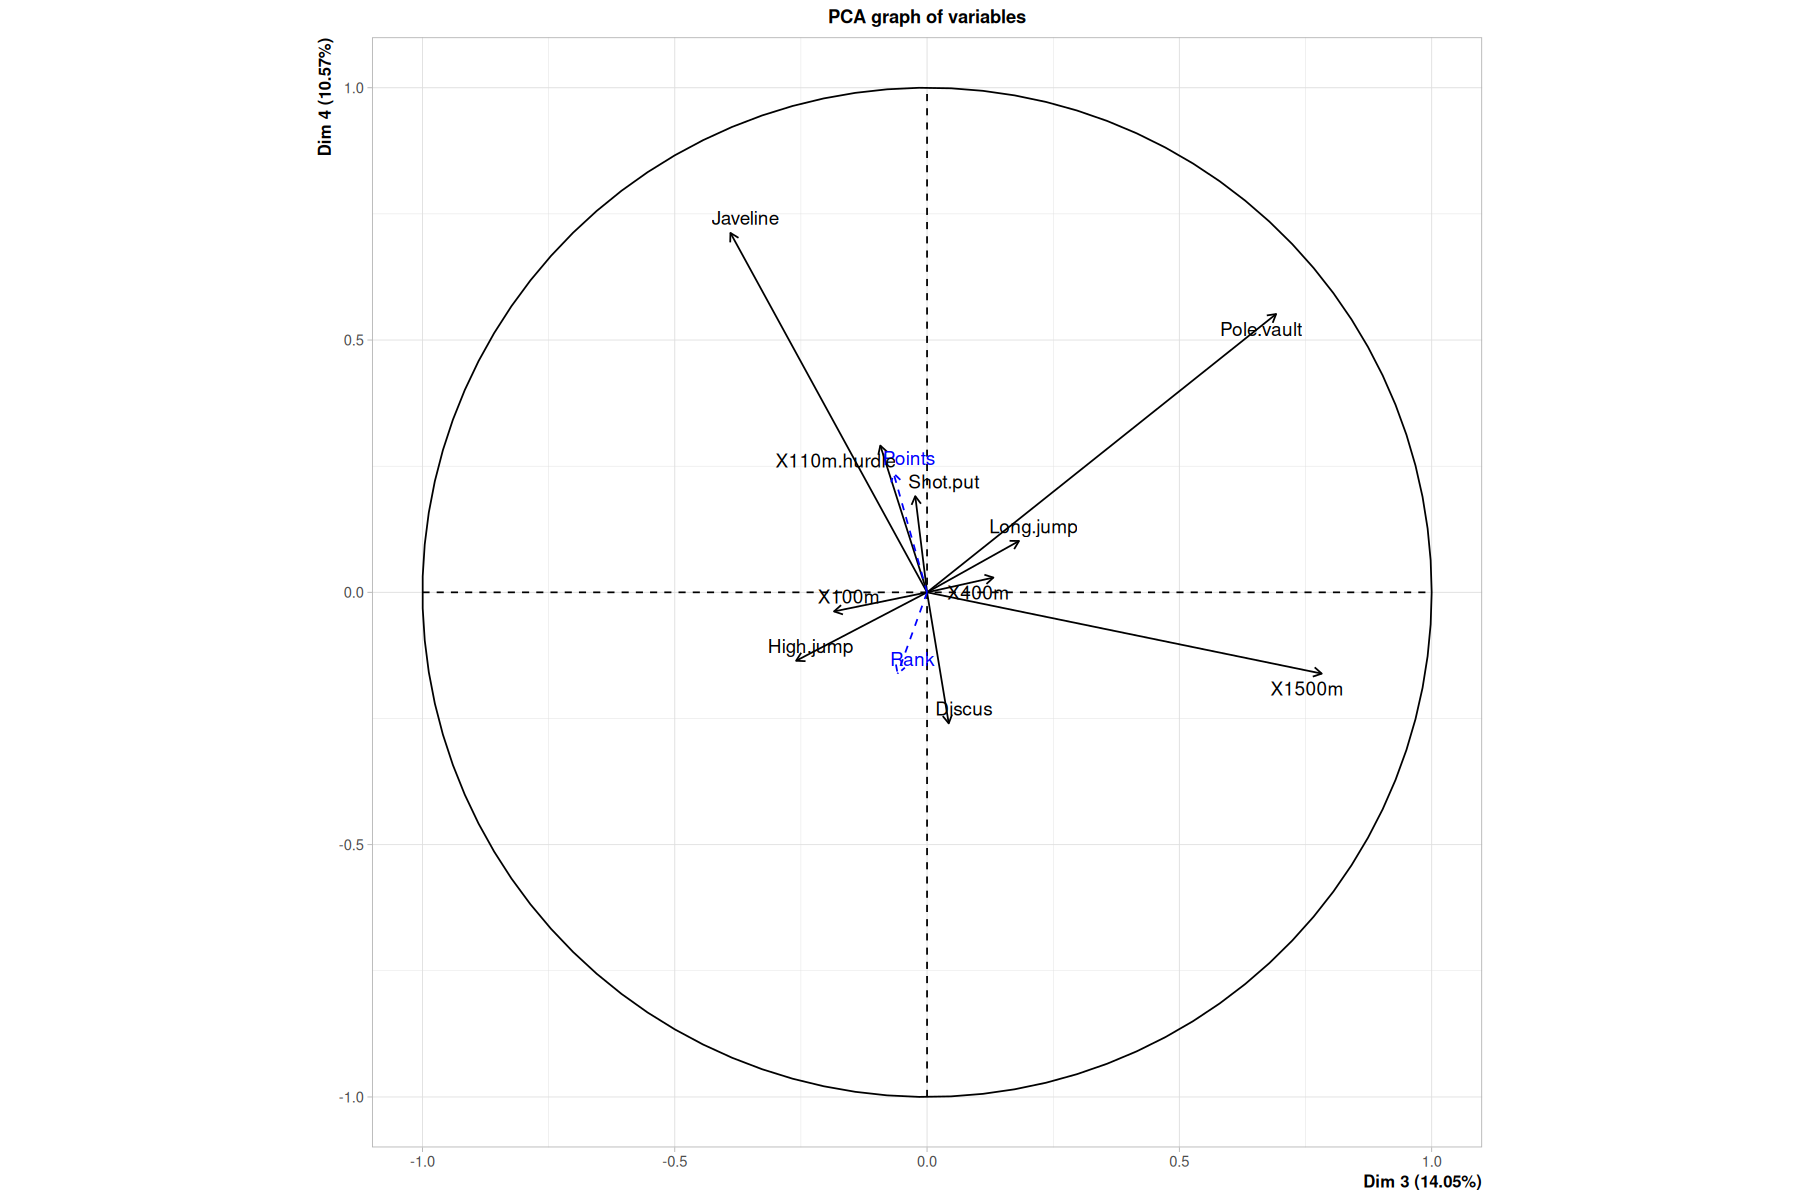

In [8]:
# Affichage des variables dans le plan 3-4
plot(res.pca, choix="var", axes=3:4) #ou axes=c(3,4)

Une certaine corrélation positive entre les variables X1500m et Pole.Vault semble apparaître. Cela signifierait que "plus un athlète saute haut (avec perche), plus il est lent au 1500m" - attention ce n'est qu'une vague tendance, à vérifier numériquement ! De plus ce plan ne capte que 25% de l'inertie totale.

corrplot 0.92 loaded



Pole.vault Javeline   X1500m    
Pole.vault  1.0000000 -0.0300006  0.2474478
Javeline   -0.0300006  1.0000000 -0.1803931
X1500m      0.2474478 -0.1803931  1.0000000

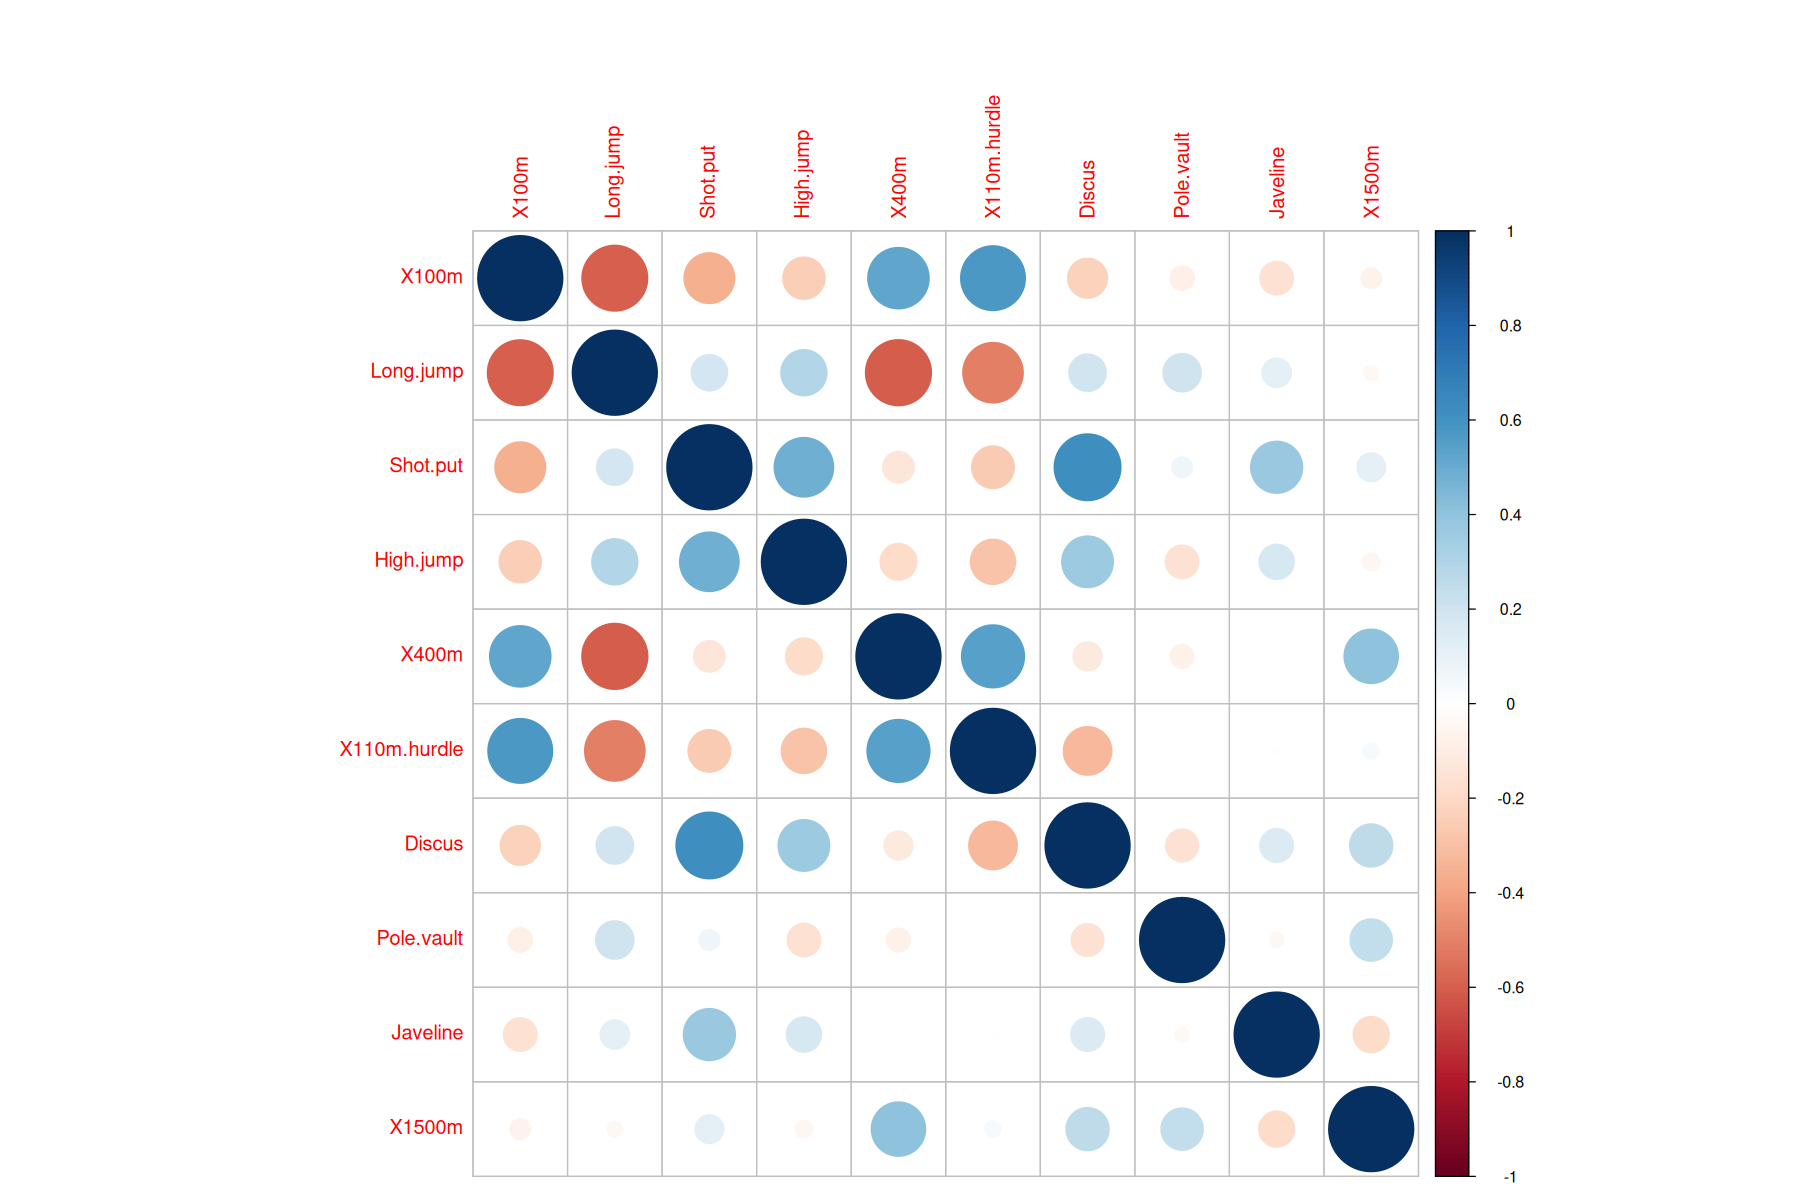

In [9]:
library(corrplot)
correlations <- cor(data[,-(11:13)])
corrplot(correlations)
# Une légère corrélation positive se confirme, de l'ordre de 0.2 ;
# on peut vérifier numériquement en affichant la matrice partielle :
correlations[8:10,8:10]

# Exercice 1

In [10]:
data <- read.csv("../data/Pizza.csv")
head(data)

brand id    mois  prot  fat   ash  sodium carb cal 
1 A     14069 27.82 21.43 44.87 5.11 1.77   0.77 4.93
2 A     14053 28.49 21.26 43.89 5.34 1.79   1.02 4.84
3 A     14025 28.35 19.99 45.78 5.08 1.63   0.80 4.95
4 A     14016 30.55 20.15 43.13 4.79 1.61   1.38 4.74
5 A     14005 30.49 21.28 41.65 4.82 1.64   1.76 4.67
6 A     14075 31.14 20.23 42.31 4.92 1.65   1.40 4.67

La première colonne ("brand") indique la marque de pizza :
elle ne peut pas contribuer à l'ACP car elle n'est pas numérique.
Elle sera utile plus tard tout de même, pour visualiser les caractériqtiques des marques.

La seconde colonne est un identifiant, sans aucun intérêt en ce qui nous concerne.

In [11]:
data <- data[,-2]
res.pca <- PCA(data, quali.sup=1)

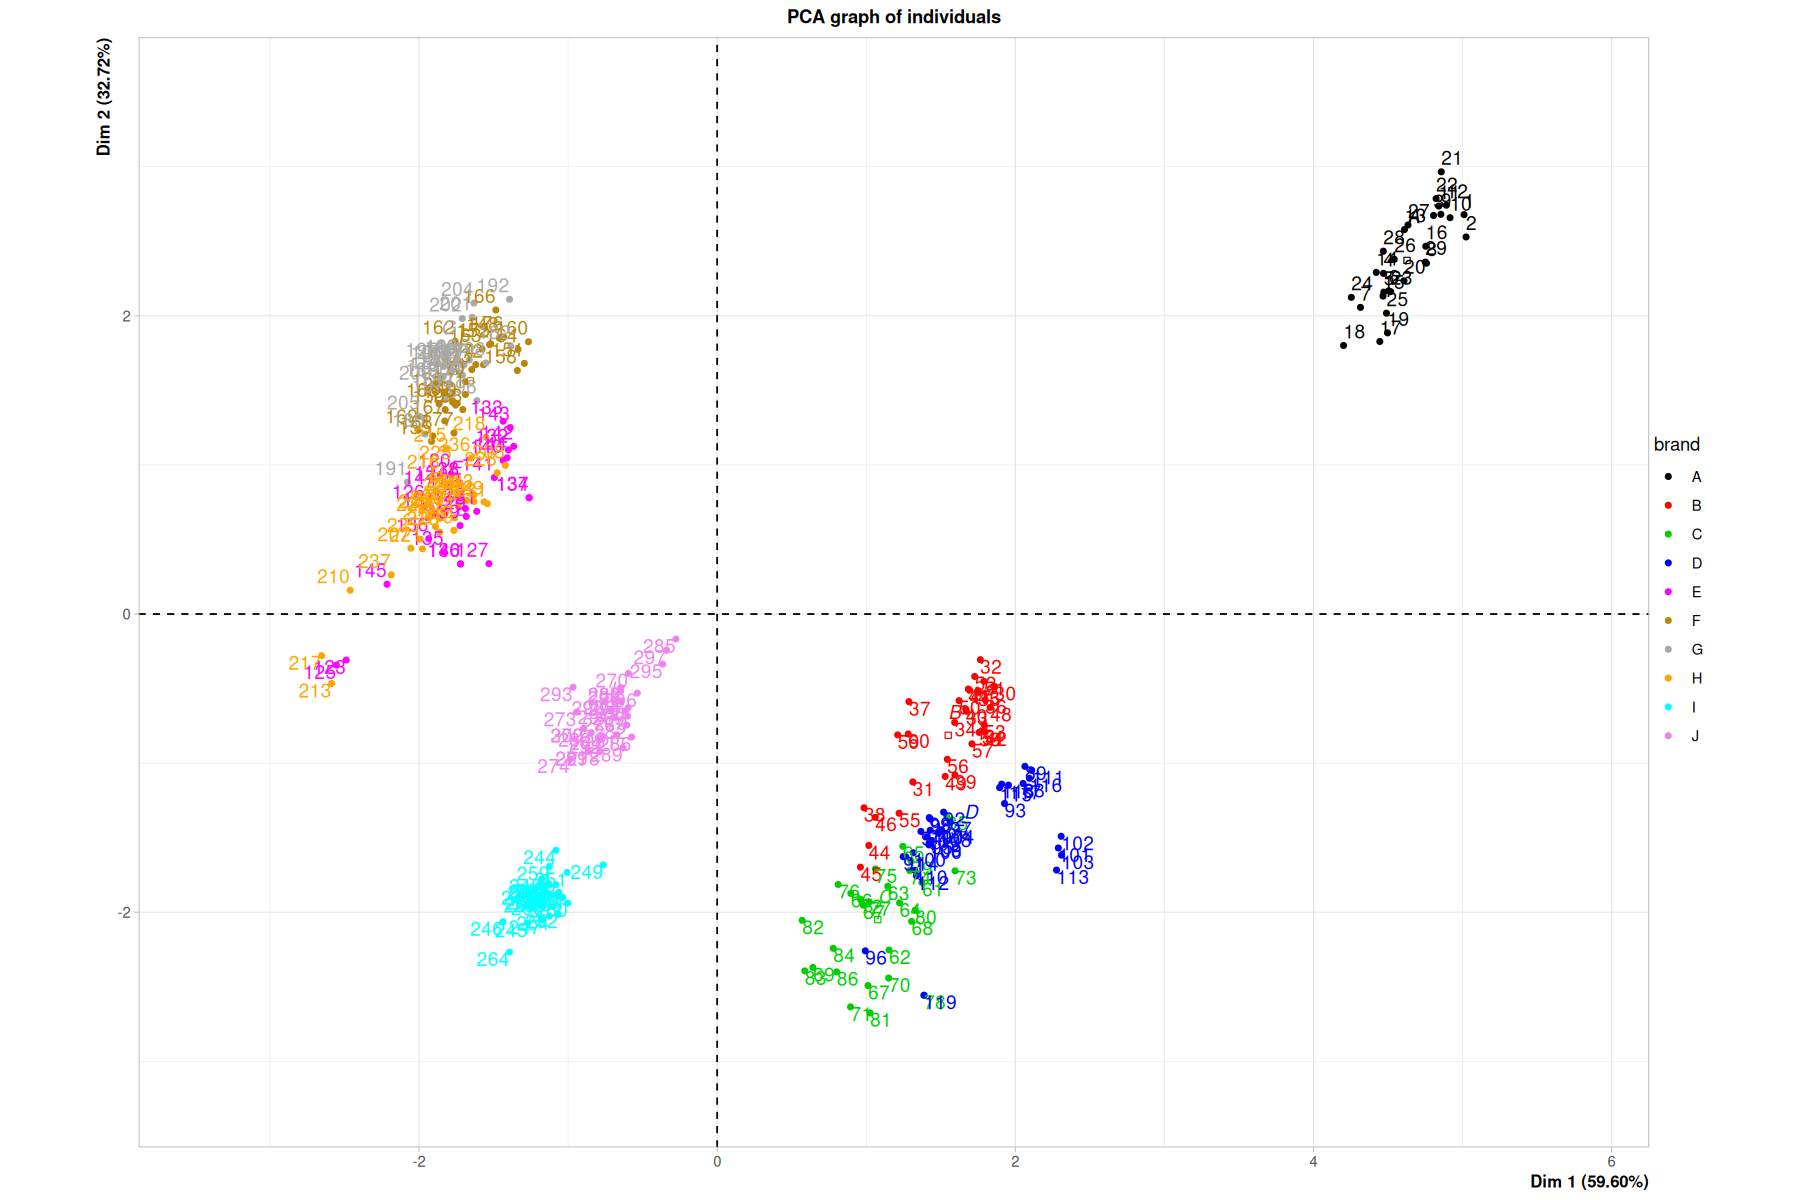

In [12]:
plot(res.pca, choix="ind", habillage=1)
# Anticipant un peu sur la séance "clustering", on voit clairement plusieurs groupes :
# les pizzas d'une même marque "se ressemblent" et sont à quelques exceptions près très différentes des autres.

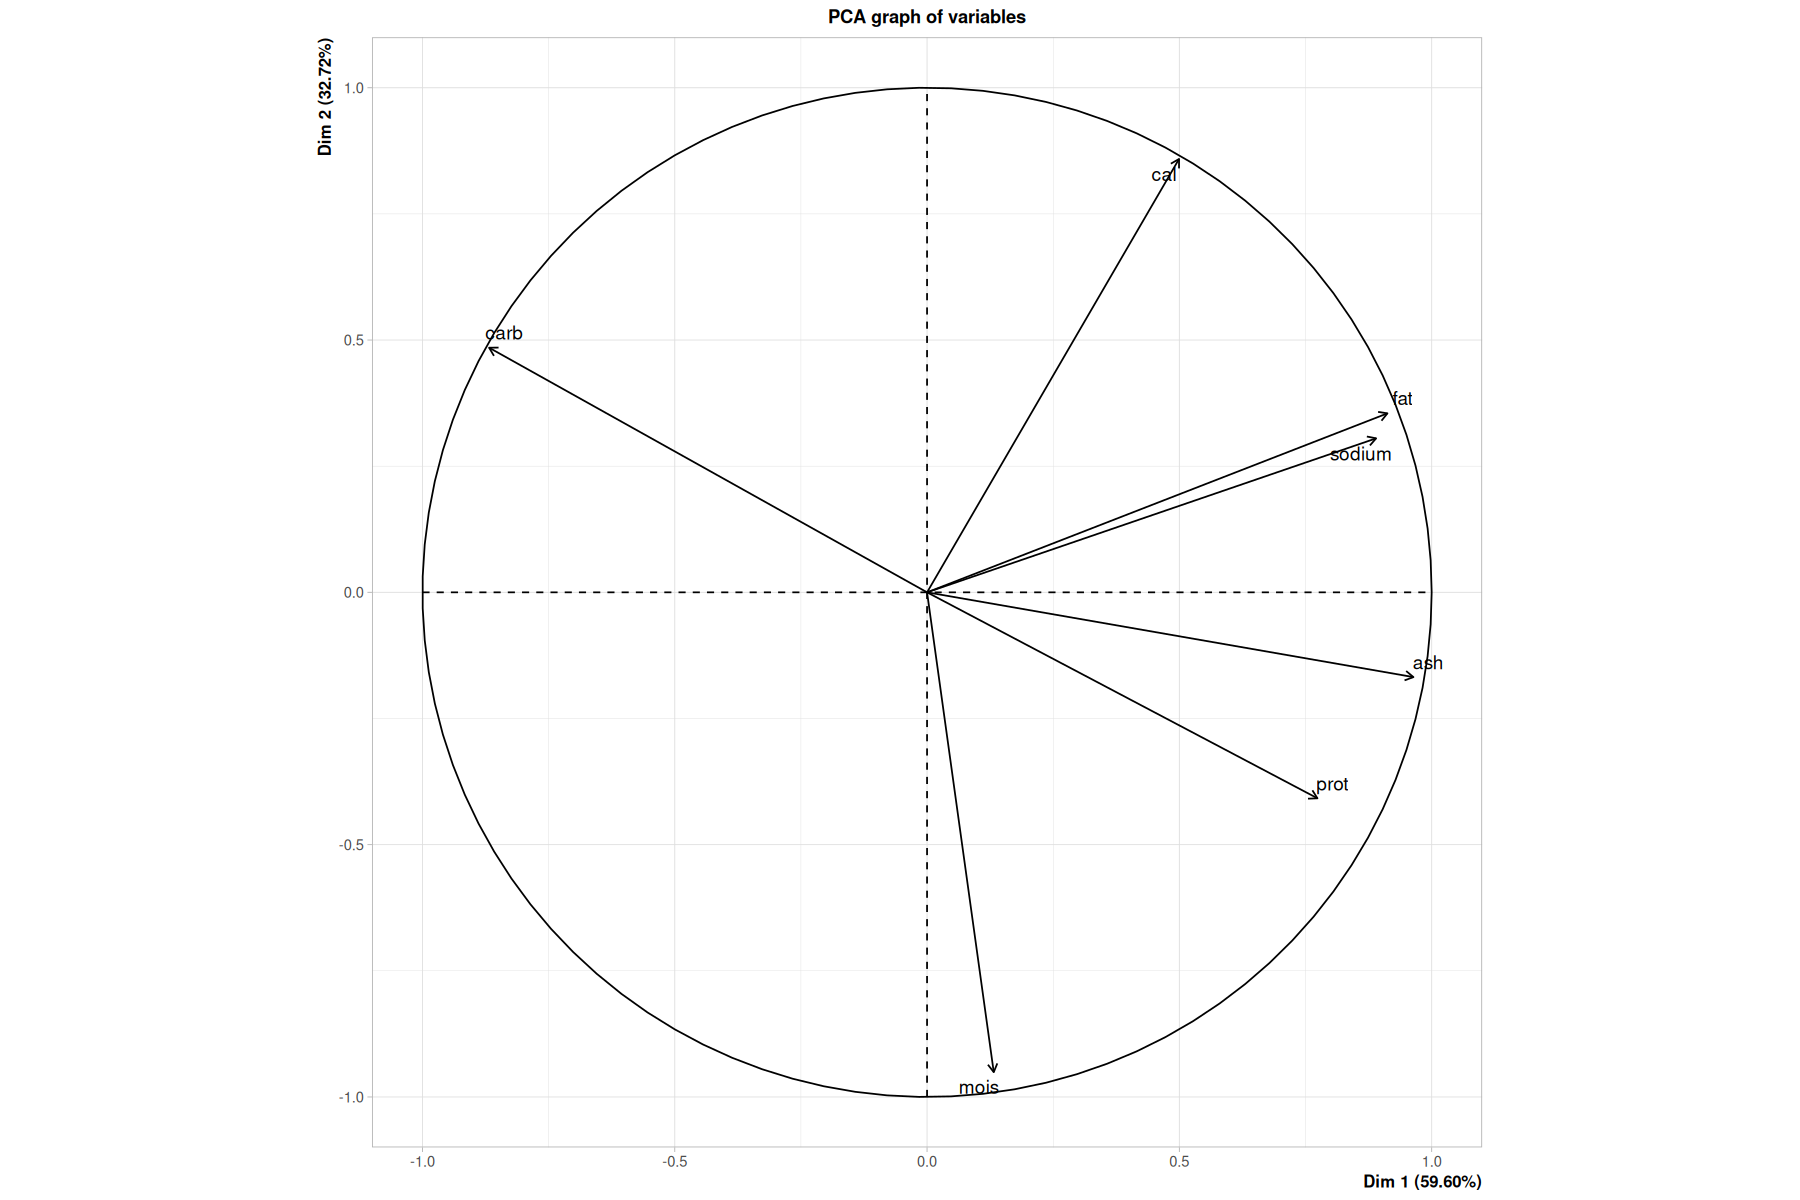

In [13]:
plot(res.pca, choix="var")

https://www.zumub.com/blog/fr/quels-sont-vos-carbohydrates/ : "Les carbohydrates [...] peuvent être trouvés dans différents aliments tels que le miel, les biscuits, le pain [...]" => on comprend donc qu'un taux élevé de "carb" signifie "pizza à pâte épaisse" (généralement peu garnie. Chacun ses goûts hein mais autant se faire un sandwich '^^). L'opposition quasi parfaite avec la teneur en protéines "prot" s'en trouve expliquée. Beaucoup de viande ou beaucoup de pâte, il faut choisir.

Ensuite, on remarque que les pizzas plus grasses sont souvent plus caloriques, ce qui n'est pas très étonnant non plus. La très forte corrélation "sodium" / "fat" semble indiquer qu'il s'agit de [ce type d'ingrédient](https://www.quechoisir.org/comparatif-additifs-alimentaires-n56877/e470a-sels-de-sodium-de-potassium-et-de-calcium-d-acides-gras-p223777/), ce qui ne donne a priori pas très envie de goûter les pizzas de la marque "A"...

Enfin, la quantité d'eau présente dans l'échantillon n'est pas vraiment (positivement) corrélée aux autres variables (sauf "prot" : fruits de mer ?!), Les pizzas protéinées semblent aussi plus cendrées, mais j'ai du mal à interpréter ça (quelqu'un a une idée ?).

Note : 92% expliqués avec les deux premiers axes => pas besoin d'aller plus loin.

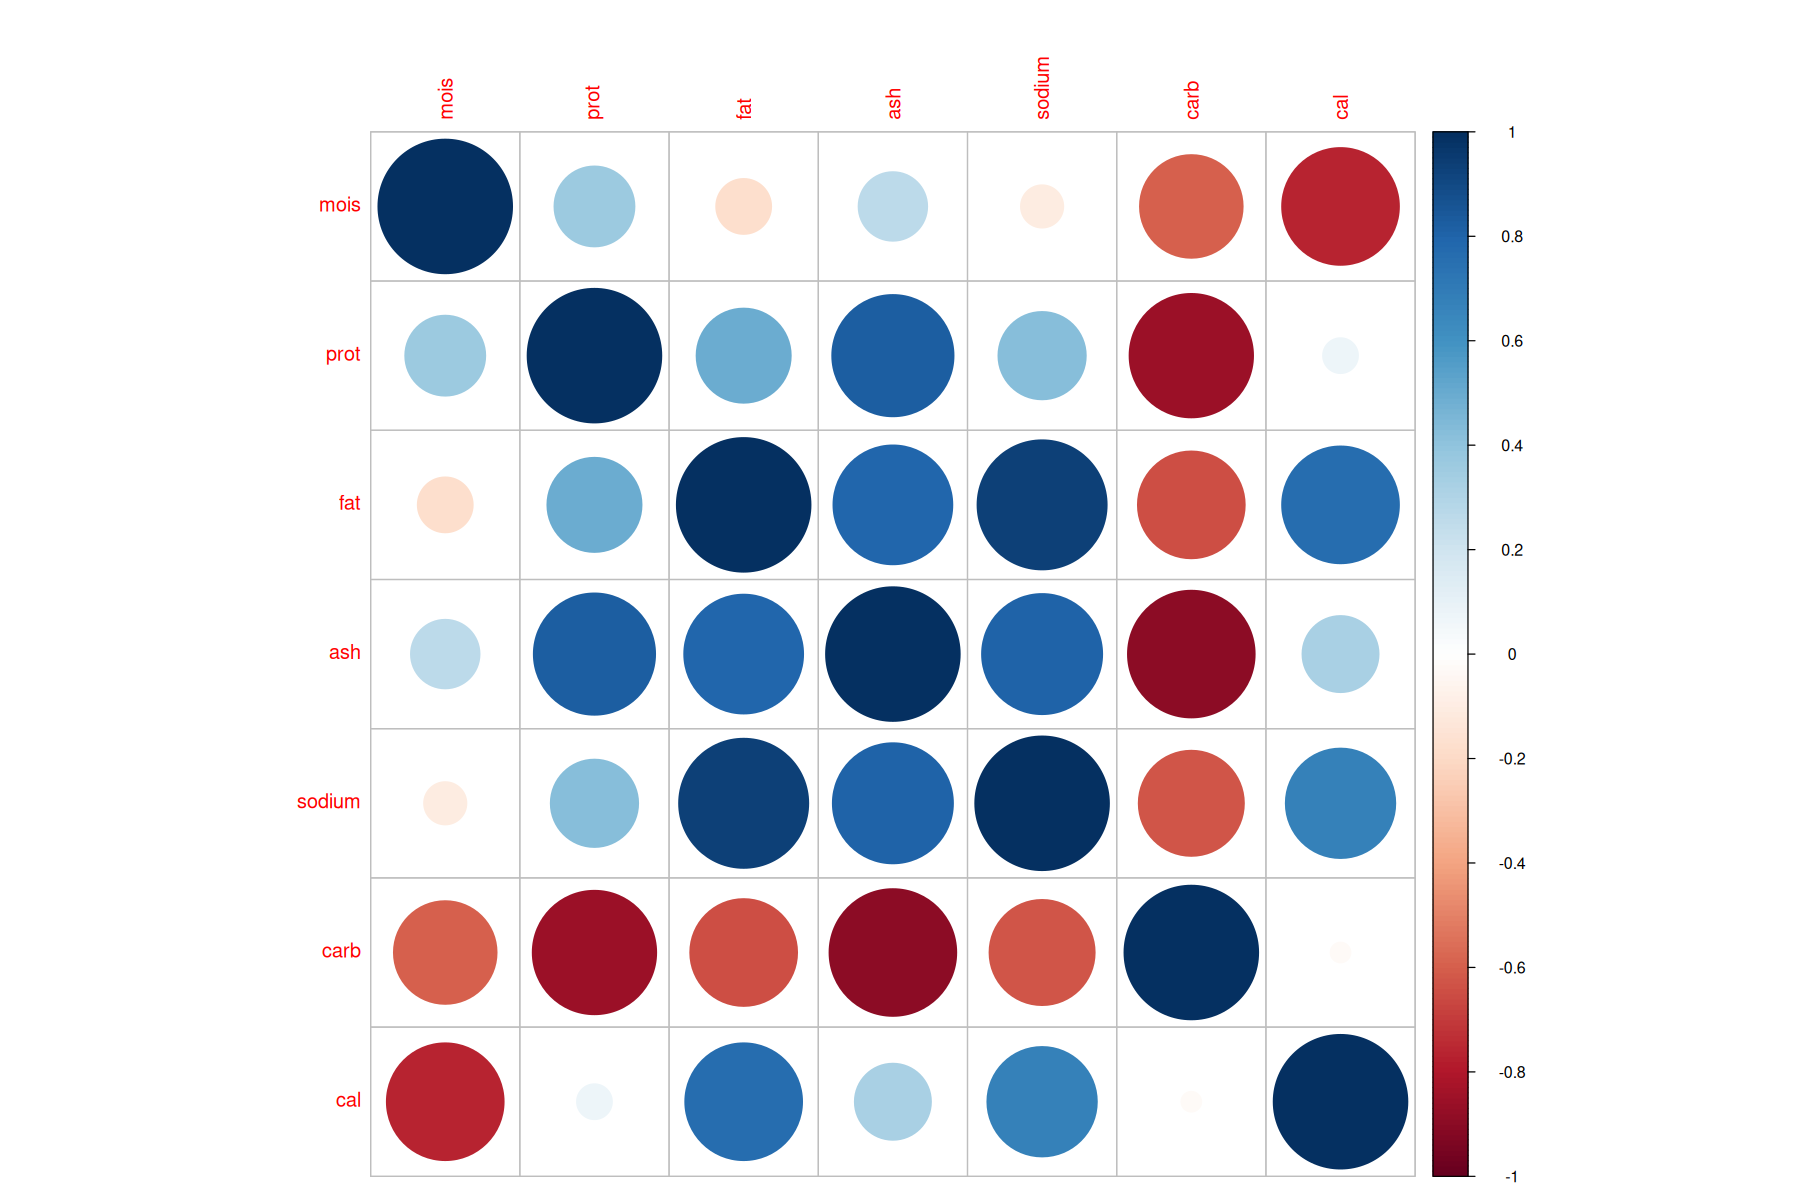

In [14]:
# Vérification numérique (visuelle)
correlations <- cor(data[,-1])
corrplot(correlations)

Les corrélations semblent plus marquées sur ce dernier graphe. Il resterait à en expliquer certaines, n'hésitez pas si vous avez des idées !

# Exercice 2

In [15]:
data <- read.csv("../data/video_games.csv")
head(data)

Title                      Features.Handheld. Features.Max.Players
1 Super Mario 64 DS          True               1                   
2 Lumines: Puzzle Fusion     True               1                   
3 WarioWare Touched!         True               2                   
4 Hot Shots Golf: Open Tee   True               1                   
5 Spider-Man 2               True               1                   
6 The Urbz: Sims in the City True               1                   
  Features.Multiplatform. Features.Online. Metadata.Genres               
1 True                    True             Action                        
2 True                    True             Strategy                      
3 True                    True             Action,Racing / Driving,Sports
4 True                    True             Sports                        
5 True                    True             Action                        
6 True                    True             Simulation                    
  Metadata.Licensed. Metadata.Publishers Metadata.Sequel. Metrics.Review.Score
1 True               Nintendo            True             85                  
2 True               Ubisoft             True             89                  
3 True               Nintendo            True             81                  
4 True               Sony                True             81                  
5 True               Activision          True             61                  
6 True               EA                  True             67                  
  ⋯ Length.Main...Extras.Average Length.Main...Extras.Leisure
1 ⋯ 24.91667                     29.966667                   
2 ⋯  9.75000                      9.866667                   
3 ⋯  3.85000                      5.666667                   
4 ⋯  0.00000                      0.000000                   
5 ⋯ 12.76667                     17.316667                   
6 ⋯ 20.83333                     25.200000                   
  Length.Main...Extras.Median Length.Main...Extras.Polled
1 25.000000                   16                         
2  9.750000                    2                         
3  3.333333                   11                         
4  0.000000                    0                         
5 12.500000                   12                         
6 20.000000                    3                         
  Length.Main...Extras.Rushed Length.Main.Story.Average
1 18.333333                   14.333333                
2  9.616667                   10.333333                
3  2.783333                    1.916667                
4  0.000000                    0.000000                
5 10.483333                    8.350000                
6 16.450000                   15.500000                
  Length.Main.Story.Leisure Length.Main.Story.Median Length.Main.Story.Polled
1 18.316667                 14.500000                21                      
2 11.083333                 10.000000                 3                      
3  2.933333                  1.833333                30                      
4  0.000000                  0.000000                 0                      
5 11.083333                  8.000000                23                      
6 15.750000                 15.500000                 2                      
  Length.Main.Story.Rushed
1  9.700000               
2  9.583333               
3  1.433333               
4  0.000000               
5  5.333333               
6 15.250000

In [16]:
# Beaucoup de variables ! Lesquelles sont numériques ?
num_vars <- as.logical(sapply(data[1,], is.numeric))
colnames(data)[num_vars]
colnames(data)[!num_vars]

[1] "Features.Max.Players"          "Metrics.Review.Score"         
 [3] "Metrics.Sales"                 "Metrics.Used.Price"           
 [5] "Release.Year"                  "Length.All.PlayStyles.Average"
 [7] "Length.All.PlayStyles.Leisure" "Length.All.PlayStyles.Median" 
 [9] "Length.All.PlayStyles.Polled"  "Length.All.PlayStyles.Rushed" 
[11] "Length.Completionists.Average" "Length.Completionists.Leisure"
[13] "Length.Completionists.Median"  "Length.Completionists.Polled" 
[15] "Length.Completionists.Rushed"  "Length.Main...Extras.Average" 
[17] "Length.Main...Extras.Leisure"  "Length.Main...Extras.Median"  
[19] "Length.Main...Extras.Polled"   "Length.Main...Extras.Rushed"  
[21] "Length.Main.Story.Average"     "Length.Main.Story.Leisure"    
[23] "Length.Main.Story.Median"      "Length.Main.Story.Polled"     
[25] "Length.Main.Story.Rushed"

[1] "Title"                   "Features.Handheld."     
 [3] "Features.Multiplatform." "Features.Online."       
 [5] "Metadata.Genres"         "Metadata.Licensed."     
 [7] "Metadata.Publishers"     "Metadata.Sequel."       
 [9] "Release.Console"         "Release.Rating"         
[11] "Release.Re.release."

Parmi ces variables, j'ai envie de considérer "Features.Max.Players" comme qualitative : c'est a priori plutôt un indicateur du type de jeu.

In [17]:
indices <- (1:ncol(data))[num_vars]
quali.sup_indices <- c(indices[1], (1:ncol(data))[!num_vars])
indices <- indices[-1]

# Enfin prêt pour l'ACP :
res.pca <- PCA(data, quali.sup=quali.sup_indices)

Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


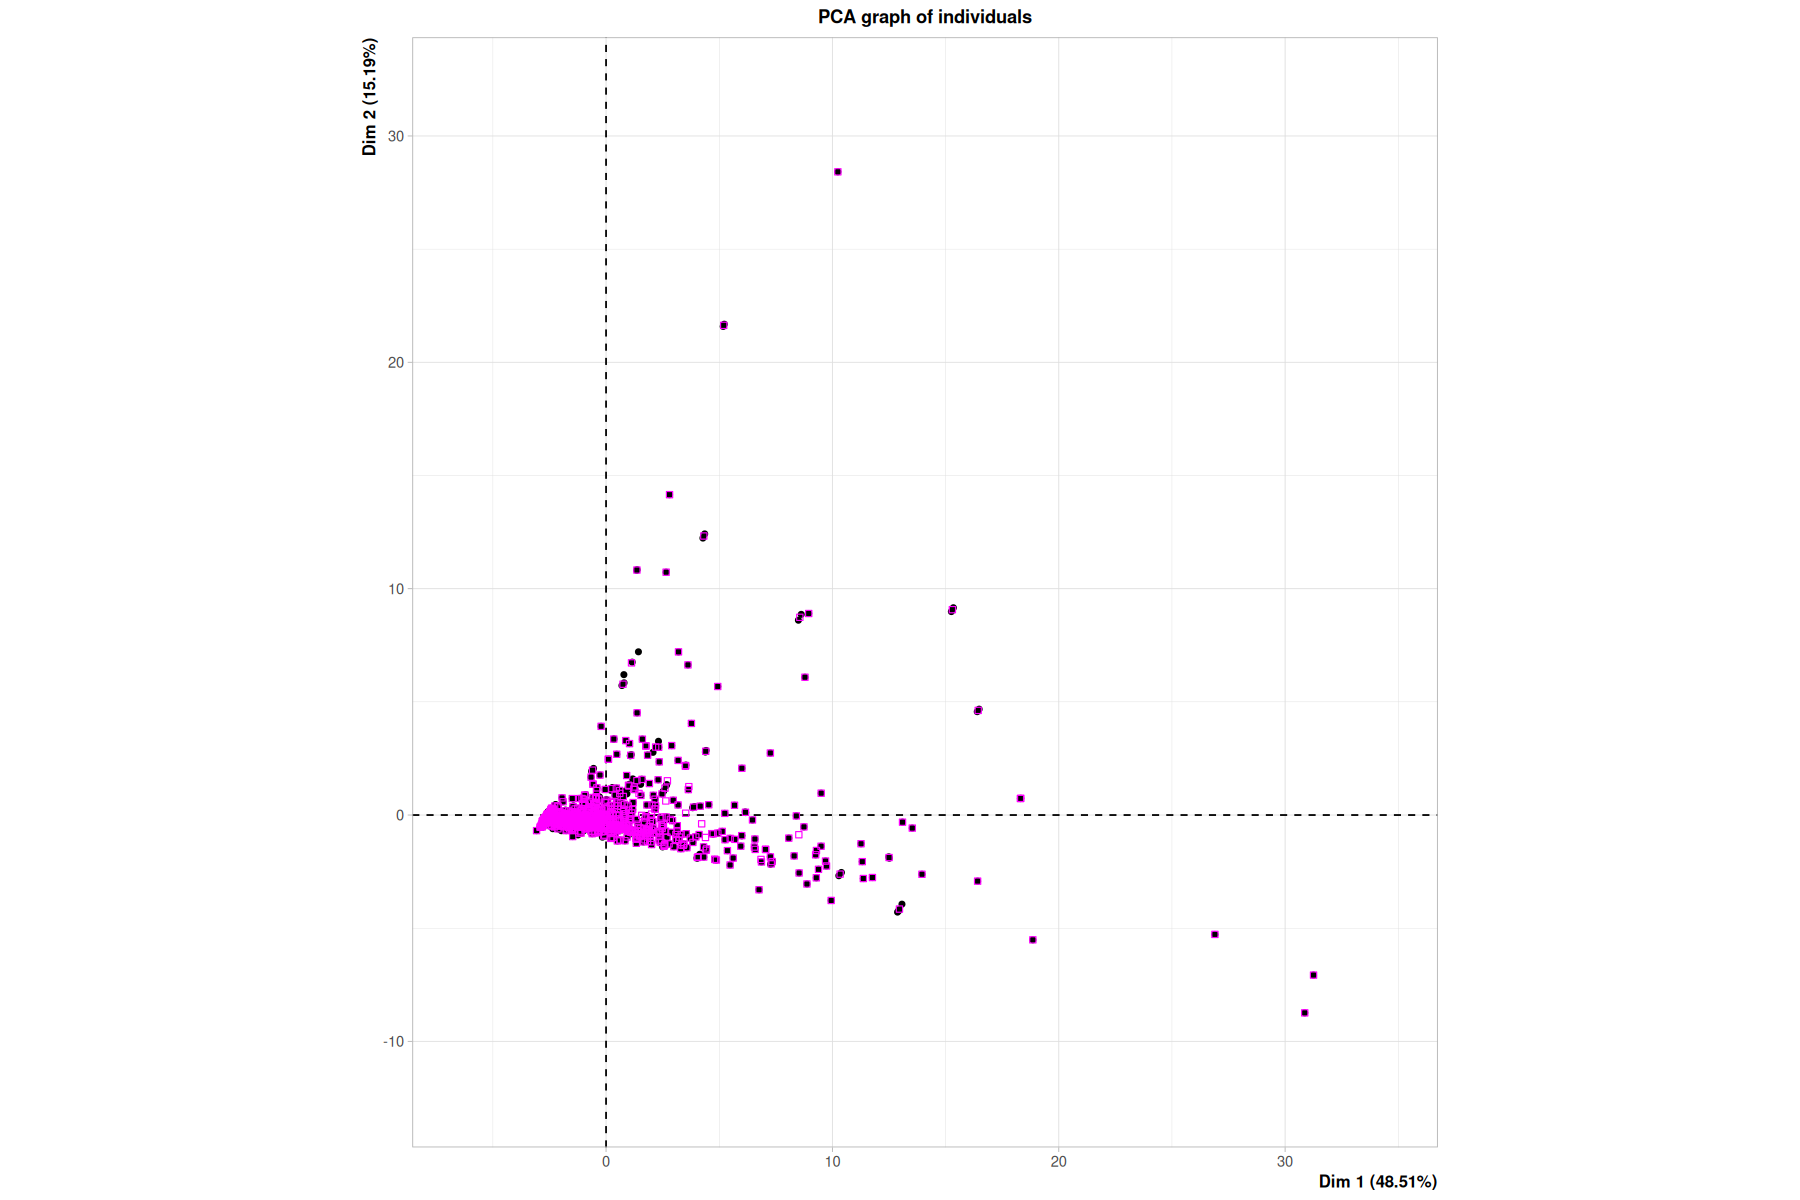

In [18]:
plot(res.pca, choix="ind", label="none")

Quelques individus extrêmes se démarquent, mais globalement on n'y voit pas grand chose et beaucoup de jeux sont confondus vers l'origine. Environ 64% d'inertie expliquée dans ce plan, ce qui est assez important même si l'analyse des axes suivants reste intéressante.

Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


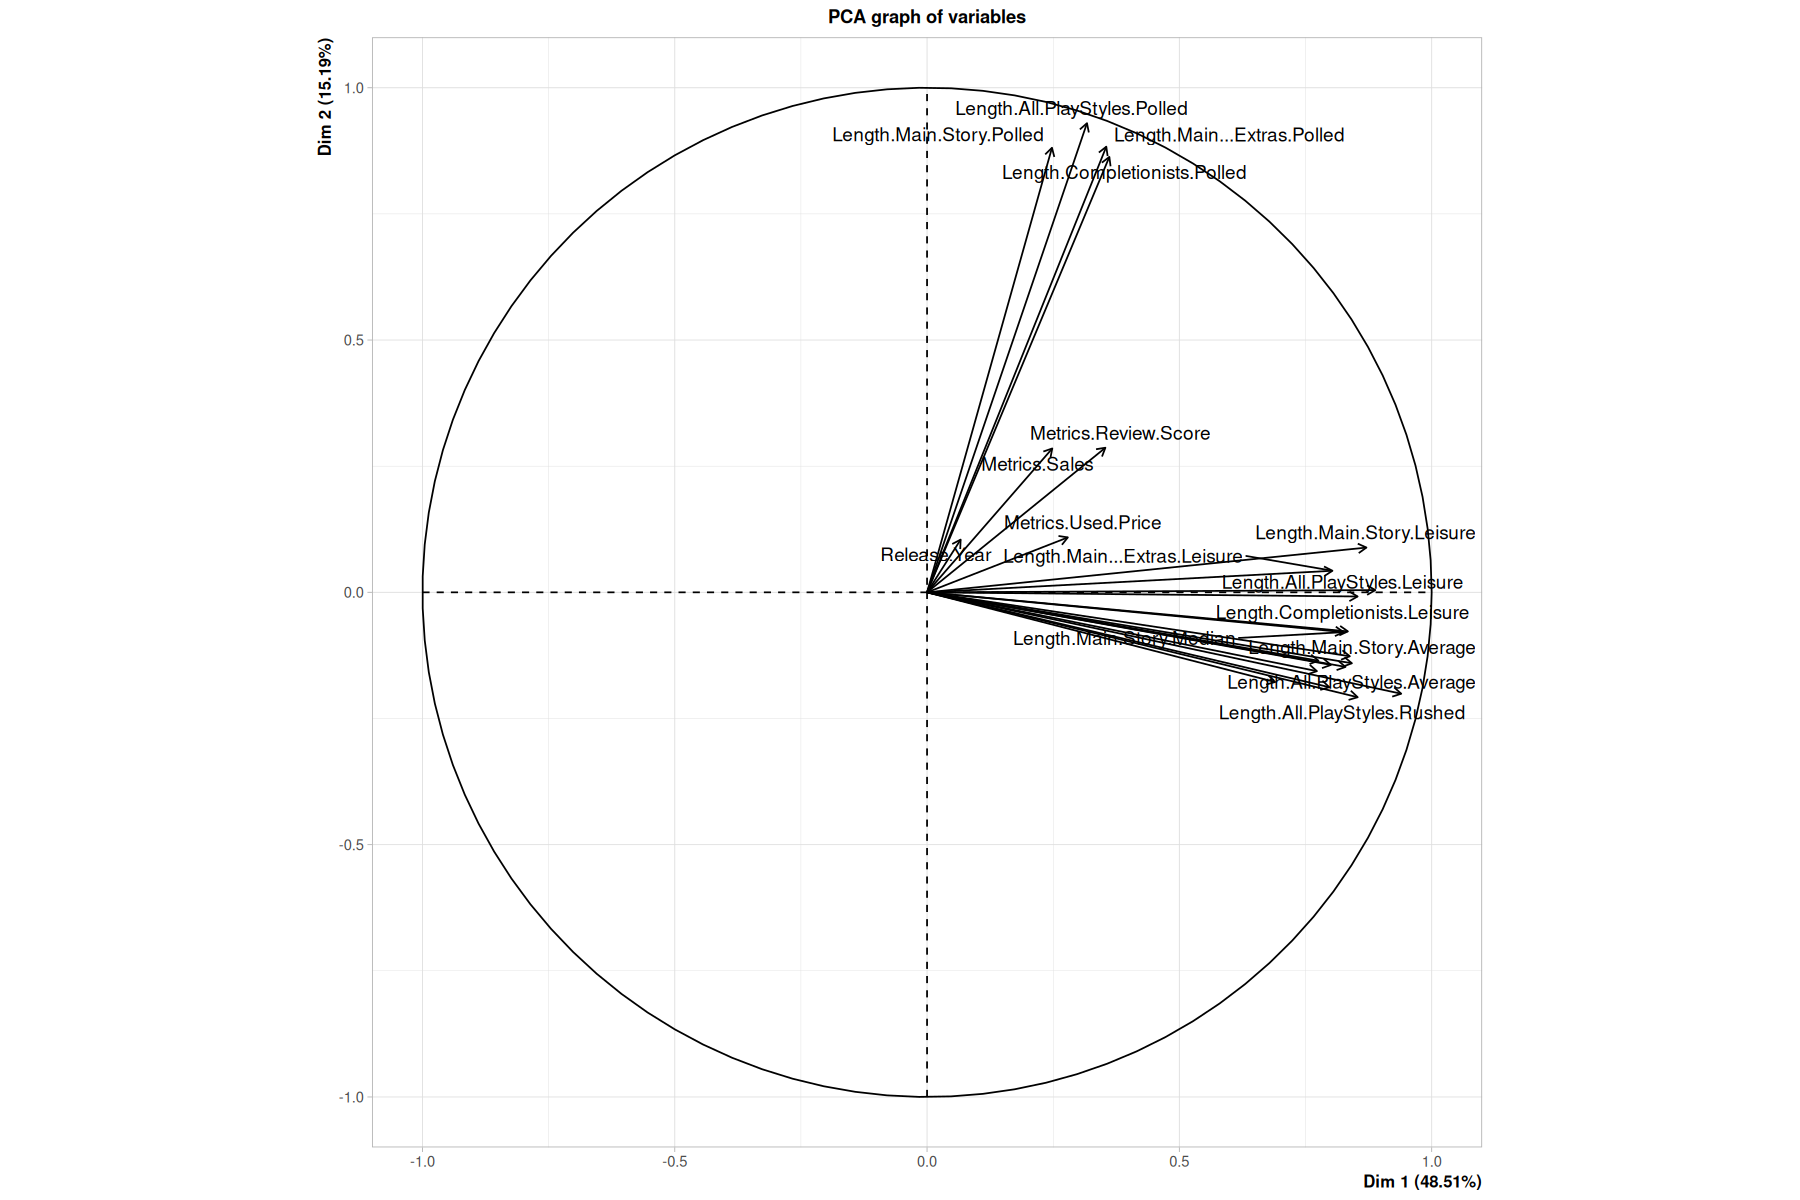

In [19]:
plot(res.pca, choix="var")

Beaucoup de variables très corrélées : on va relancer l'analyse en supprimant certaines variables (quasi) redondantes, pour tenter d'y voir plus clair.

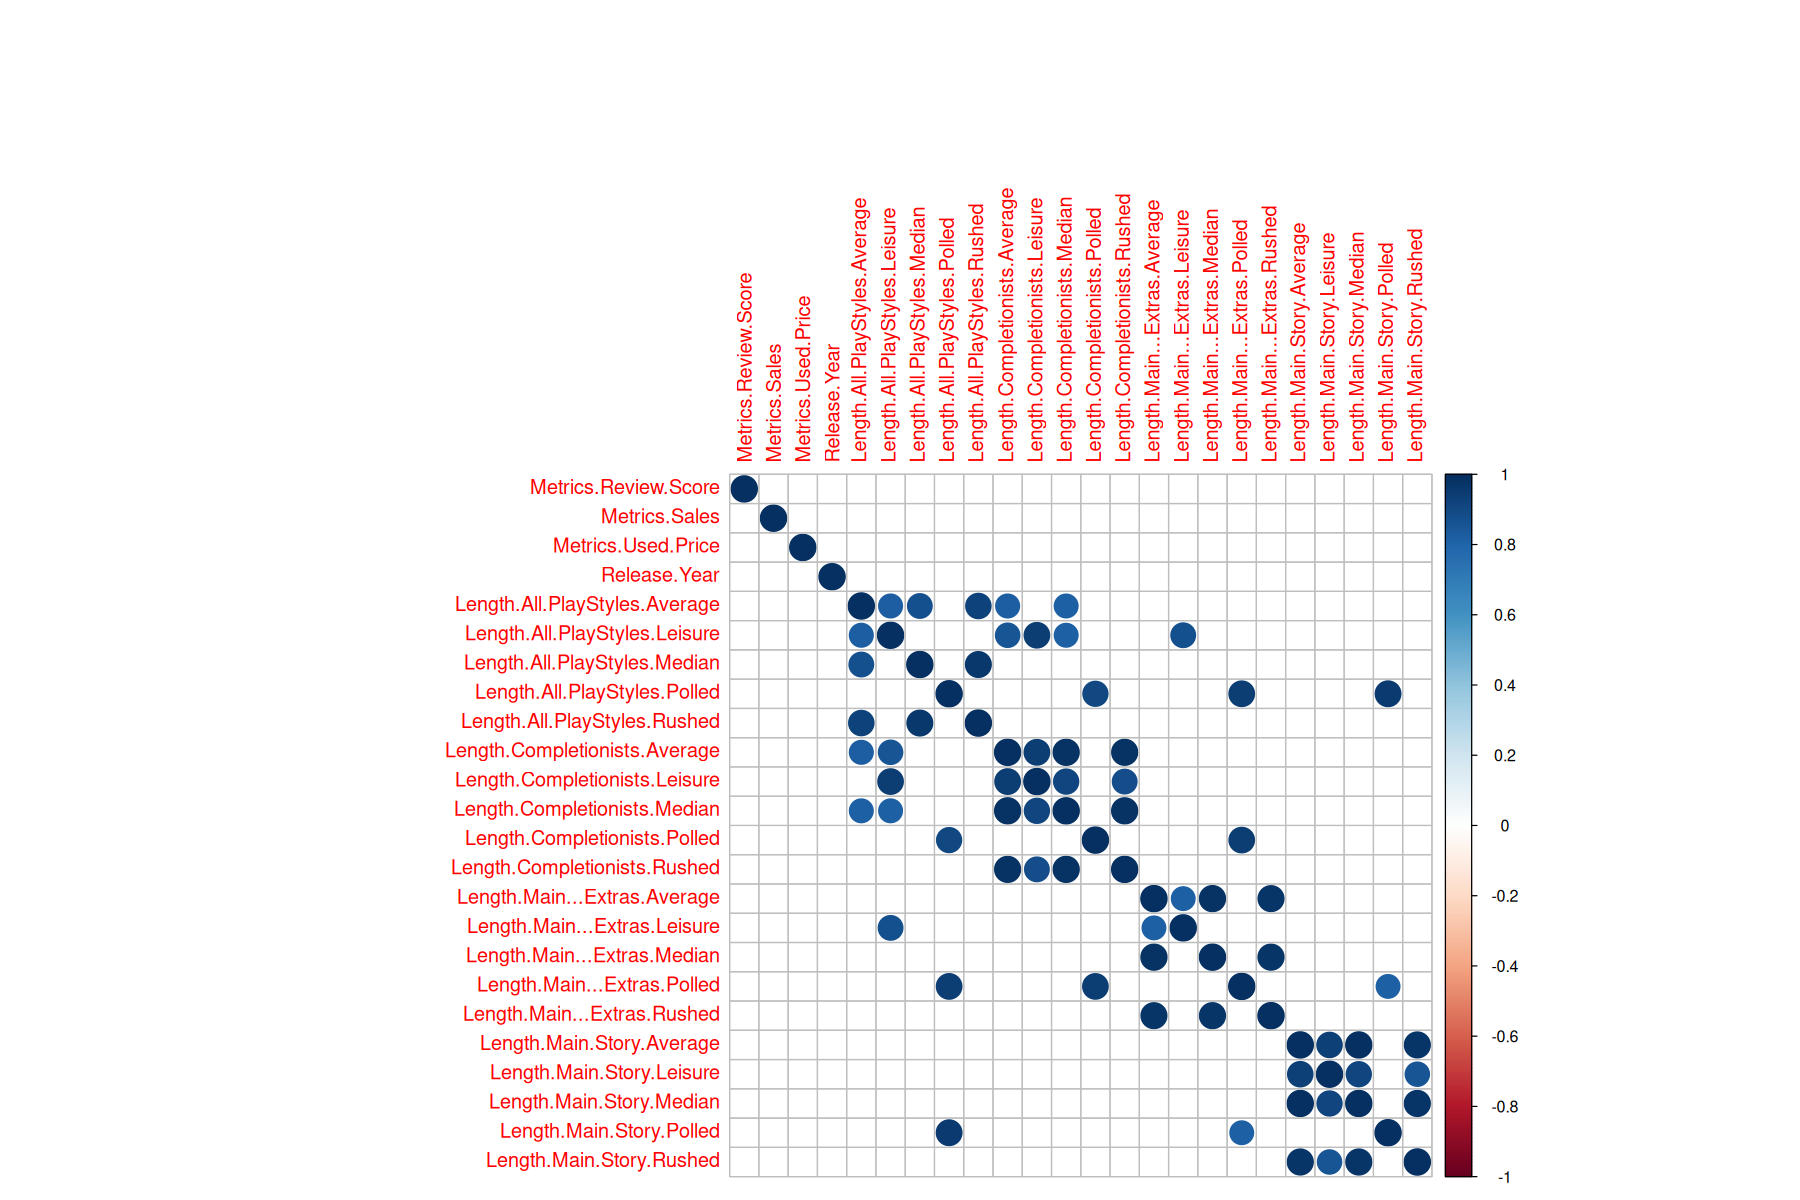

In [20]:
correlations <- cor(data[,indices])
correlations[correlations < 0.8] <- 0
corrplot(correlations)
# Visualisation des potentiels regroupements à effectuer :

Regroupements :

'Metrics.Review.Score'

'Metrics.Sales'

'Metrics.Used.Price'

'Release.Year'

'Length.All.PlayStyles.Polled' (disons qu'on garde celle-là) <br>
'Length.Completionists.Polled' <br>
'Length.Main.Story.Polled' <br>
'Length.Main...Extras.Polled'

'Length.Main.Story.Leisure' <br>
'Length.Main.Story.Average' <br>
'Length.Main.Story.Median' (gardée) <br>
'Length.Main.Story.Rushed'

'Length.All.PlayStyles.Rushed' <br>
'Length.All.PlayStyles.Median' (gardée) <br>
'Length.All.PlayStyles.Average'

'Length.Completionists.Average' (gardée) <br>
'Length.Completionists.Leisure' <br>
'Length.Completionists.Median' <br>
'Length.Completionists.Rushed'

'Length.Main...Extras.Average' <br>
'Length.Main...Extras.Median' (gardée) <br>
'Length.Main...Extras.Rushed'

'Length.Main...Extras.Leisure'

'Length.All.PlayStyles.Leisure'

=> 11 variables "seulement" au lieu de 24.

In [21]:
keep_vars <- c('Metrics.Review.Score','Metrics.Sales','Metrics.Used.Price','Release.Year',
               'Length.All.PlayStyles.Polled','Length.Main.Story.Median','Length.All.PlayStyles.Median',
               'Length.Completionists.Average','Length.Main...Extras.Median','Length.Main...Extras.Leisure',
               'Length.All.PlayStyles.Leisure')
indices <- (1:ncol(data))[colnames(data) %in% keep_vars]
data <- data[,c(indices, quali.sup_indices)]

In [22]:
qual_vars <- !as.logical(sapply(data[1,], is.numeric))
quali.sup_indices <- (1:ncol(data))[qual_vars]

# Enfin prêt pour l'ACP "v2" ^^
res.pca <- PCA(data, quali.sup=quali.sup_indices)

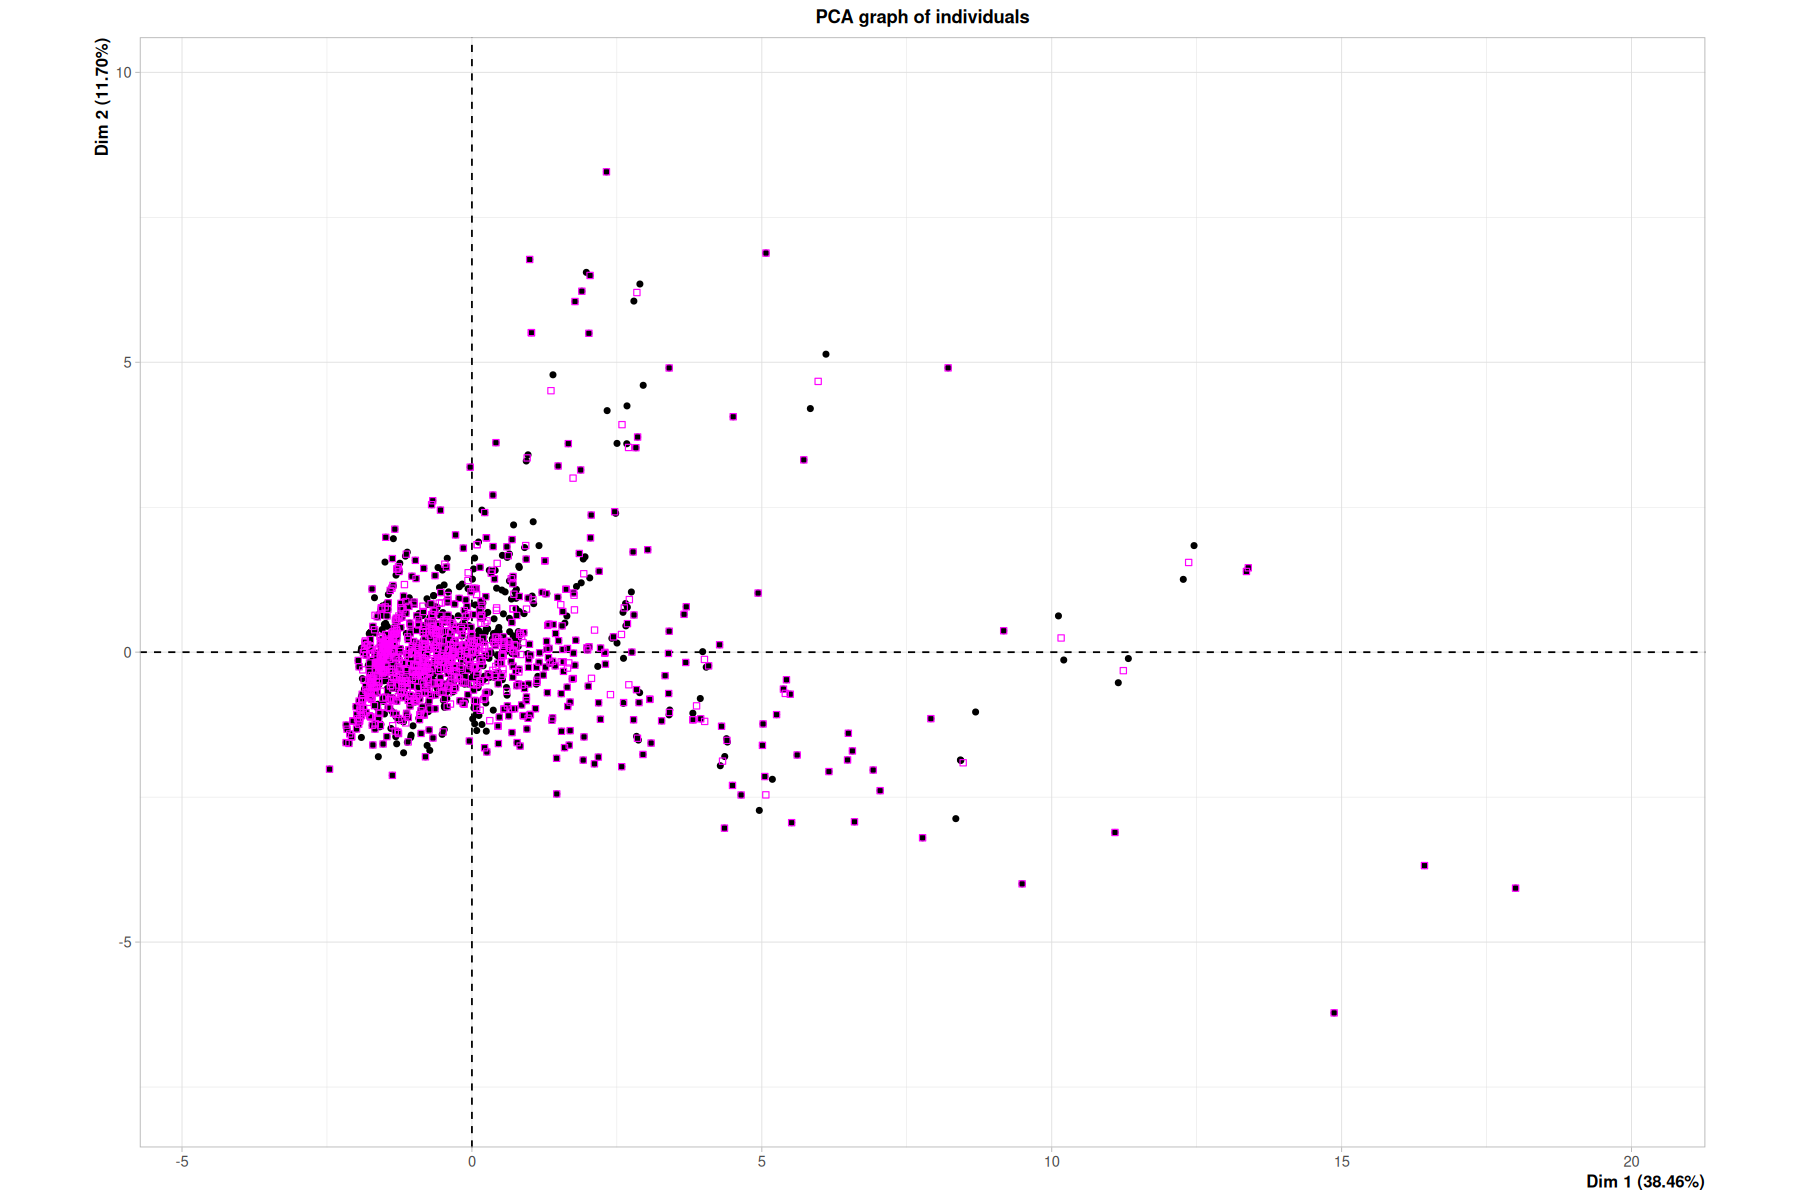

In [23]:
plot(res.pca, choix="ind", label="none")
# Le nuage semble déjà un peu plus dispersé (même si ça reste moyen).
# Seulement 50% de l'inertie dans le plan 1-2 cette fois : il faudra regarder plus loin.

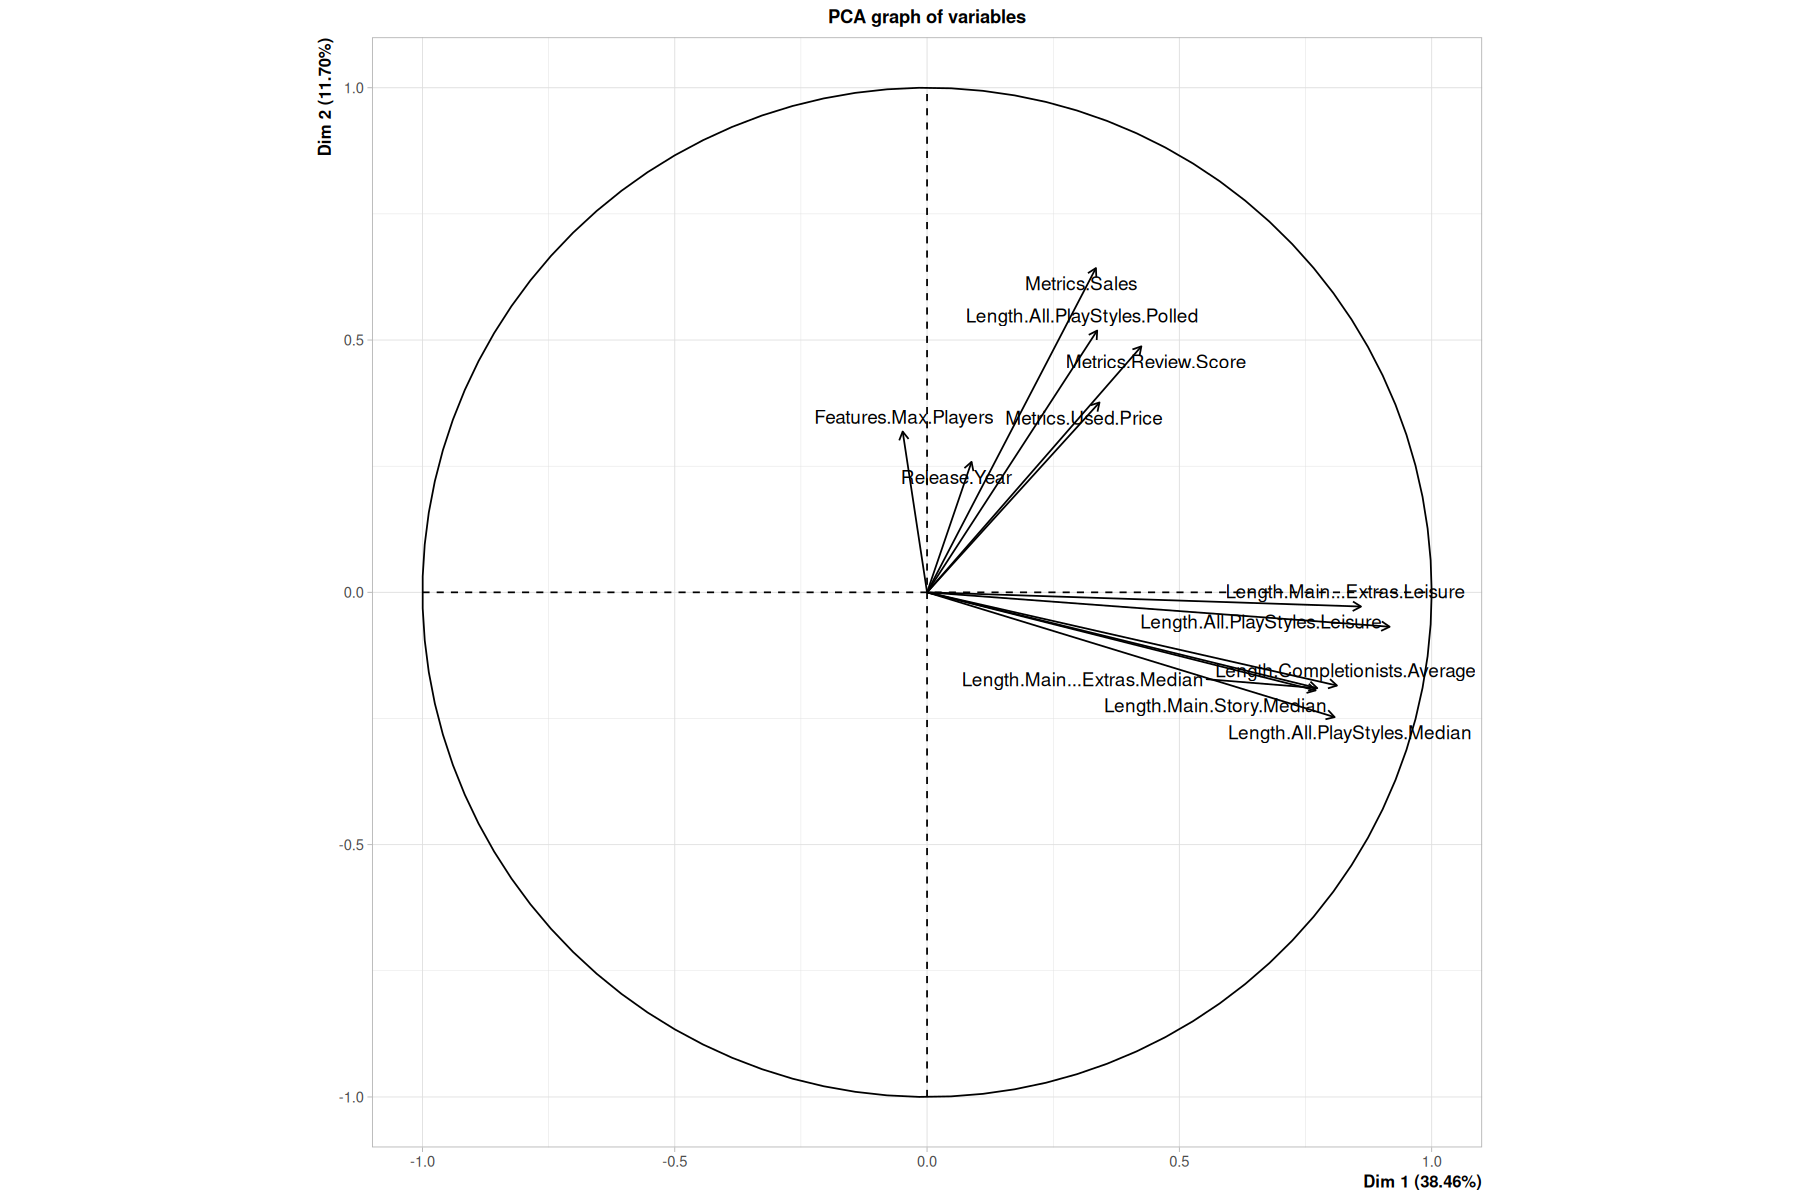

In [24]:
plot(res.pca, choix="var")

Le cercle des corrélations semble indiquer, en gros, que les jeux plus longs sont situés vers le bas à droite, tandis que les jeux les plus vendus sont plutôt vers le haut légèrement à droite. Vérification rapide :

In [25]:
rightmost <- which.max(res.pca$ind$coord[,1])
upmost <- which.max(res.pca$ind$coord[,2])
data[c(rightmost,upmost),]
# Le premier a effectivement une durée de jeu plus longue, et le second s'est bien mieux vendu :

Metrics.Review.Score Metrics.Sales Metrics.Used.Price Release.Year
855 73                    1.78         29.95              2008        
834 82                   12.39         29.95              2008        
    Length.All.PlayStyles.Leisure Length.All.PlayStyles.Median
855 431.48333                     65.000000                   
834  30.13333                      9.116667                   
    Length.All.PlayStyles.Polled Length.Completionists.Average
855  15                          617.41667                    
834 108                           19.11667                    
    Length.Main...Extras.Leisure Length.Main...Extras.Median ⋯
855 308.3833                     200                         ⋯
834  30.8000                      10                         ⋯
    Features.Handheld. Features.Multiplatform. Features.Online.
855 True               True                    True            
834 True               True                    True            
    Metadata.Genres  Metadata.Licensed. Metadata.Publishers Metadata.Sequel.
855 Simulation       True               Nintendo            True            
834 Racing / Driving True               Nintendo            True            
    Release.Console Release.Rating Release.Re.release.
855 Nintendo Wii    T              True               
834 Nintendo Wii    T              True

In [26]:
# Mais qui sont-ils ?!
data[c(rightmost,upmost),"Title"]

[1] "Animal Crossing: City Folk" "Mario Kart Wii"

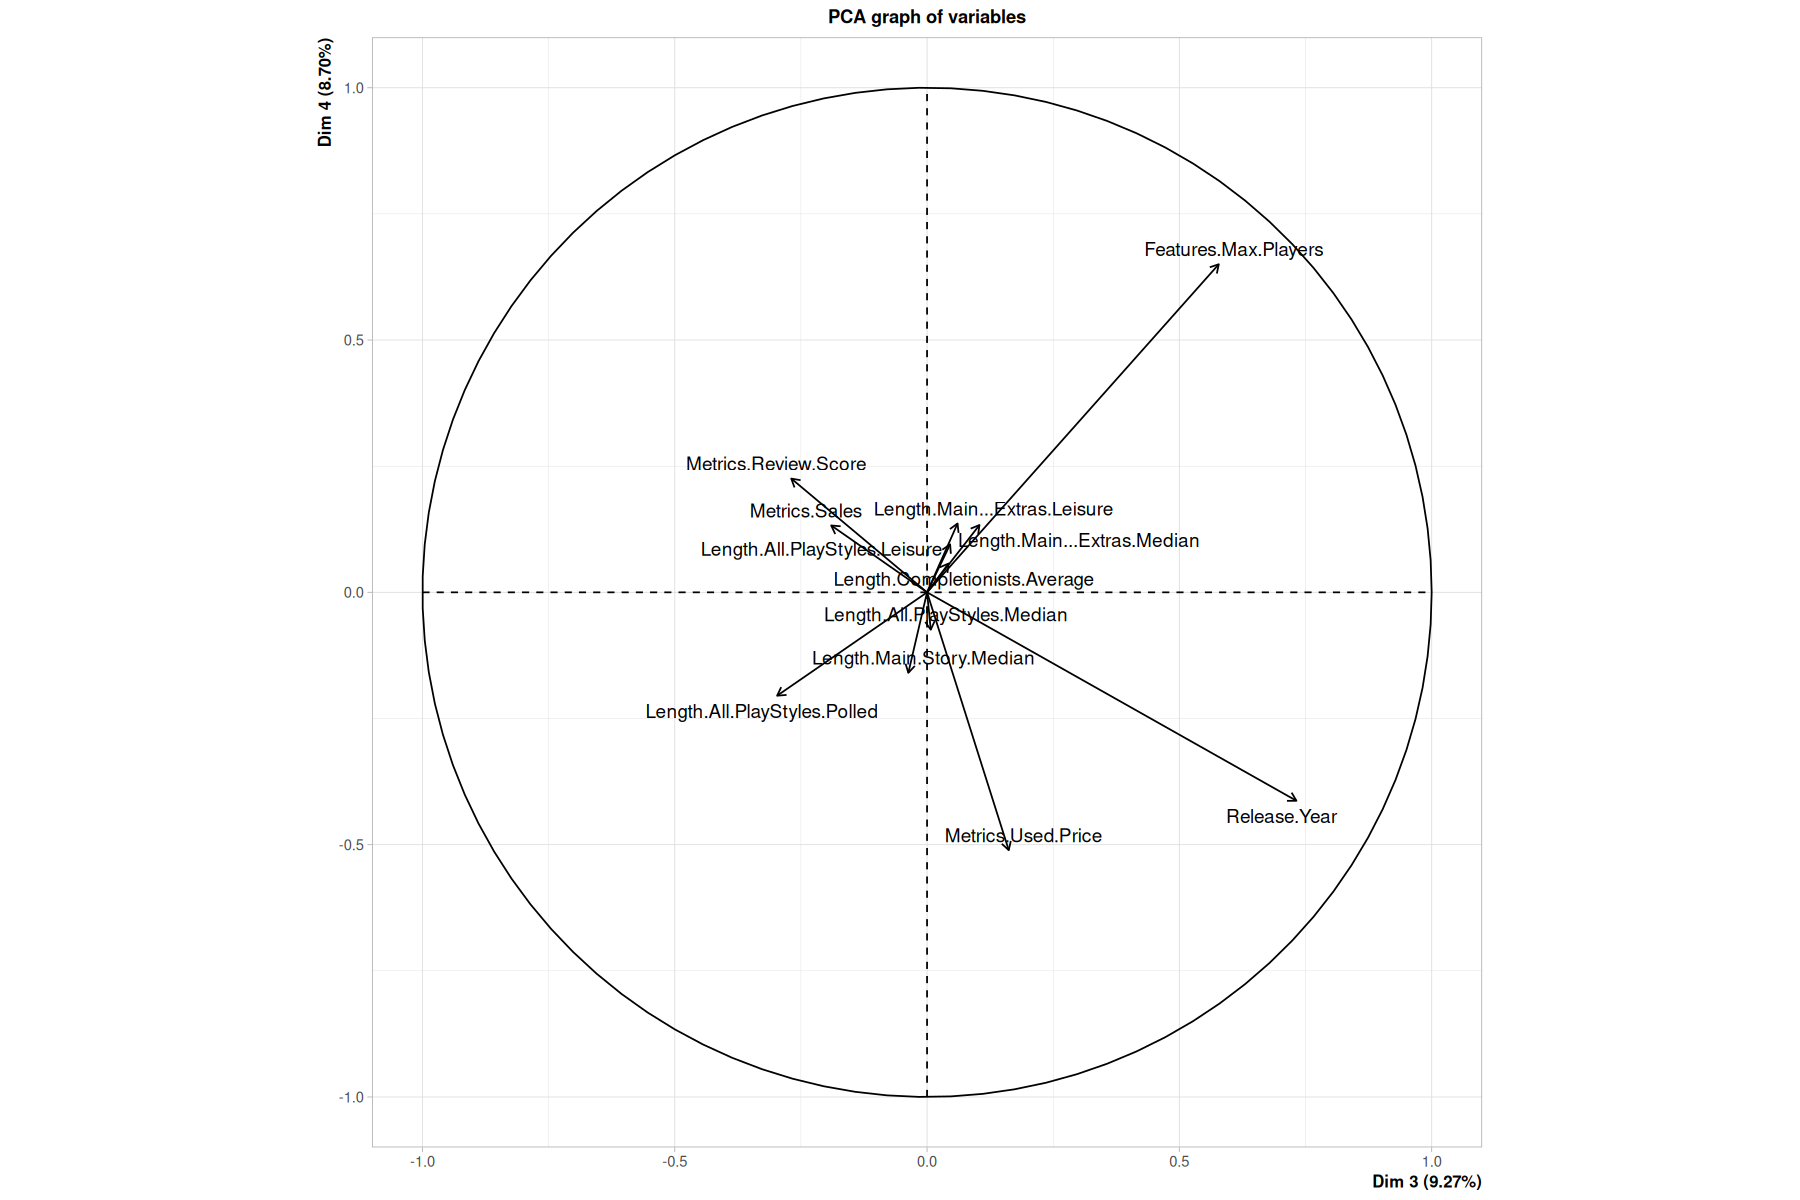

In [27]:
# Dans le plan 3-4 :
plot(res.pca, axes=3:4, choix="var")

Année de sortie complètement décorrélée du nombre de joueurs maximal : on ne voyait en effet pas très bien le rapport !